First I needed to install the pybind package for python and for c++ to use:
```
pip install pybind11
sudo apt-get install pybind11-dev
sudo apt-install Jupyter-core
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension enable --py --sys-prefix ipympl
sudo apt-get install ffmpeg

```


In [5]:
import sys
import os
sys.path.append(os.getcwd())
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
# from IPython.display import Video

def Basic_Graphic(data,size):
    y_values = np.array(data[1])
    # Static Plot
    # plt.clf()
    plt.figure( figsize=(5,5) )

    current = int(len(y_values[0])/2)

    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
        current += 3

    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()



# Moving Plot
def Animated_Graph(data,size,xl,xu,yl,yu,seconds = 8,lagtime = 0,name = ""):
    
    fig, ax = plt.subplots()
    y_values = np.array(data[1])

    current = int(len(y_values[0])/2)
    print(len(y_values))
    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        current += 3
    line_orbits = []
    for i in range(size):
        line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
        # print(len(x_vals[i]))
        line_orbits.append(line_orbit)

    # print("size of x_vals:",len(x_vals))
    def animation_movie( frame ):
        # print("Frame:",frame)
        if lagtime == 0:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][:frame])
                line.set_ydata(y_vals[i][:frame])
        else:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][(frame - lagtime):frame])
                line.set_ydata(y_vals[i][(frame - lagtime):frame])
        return line_orbits
    # print(len(line_orbits))
    n_steps = int( len(y_values) )
    # print(n_steps)
    num_seconds_for_animation = seconds
    milliseconds_per_frame = 30

    frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
    print("frame interval:",frame_interval)

    animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )
    
    

    # Display the animation inline
    ax.legend()
    ax.set_xlim(xl,xu)
    ax.set_ylim(yl,yu)
    
    # Save & Display the animation
    if name != "":
        if not os.path.isfile(name + '.gif'):
            animation.save(name + '.gif', writer='imagemagick', fps=30)
        Image(filename= "animations" + name + '.gif')
        
        # animation.save(name +'.mp4', writer='ffmpeg')
        # Video(name + '.mp4')
    else:# Use if you want to display an interactive widgit in-line
        %matplotlib widget

    

def Formatter(vector):
    VN = []
    RN = []
    for i in range(len(vector)):
        if (i % 2 == 0):
            RN += vector[i]
        else:
            VN += vector[i]
    return VN + RN


Look at how cool it looks animated!
![](./5_body_anim.mp4)

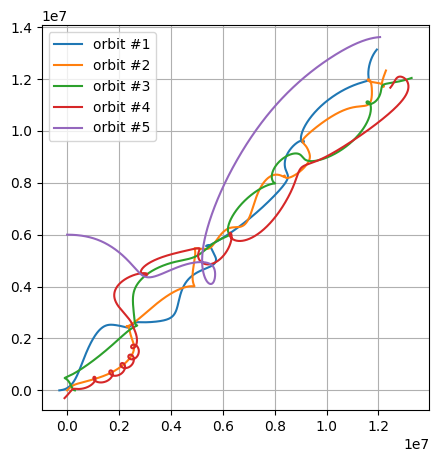

150001
frame interval: 562


MovieWriter imagemagick unavailable; using Pillow instead.


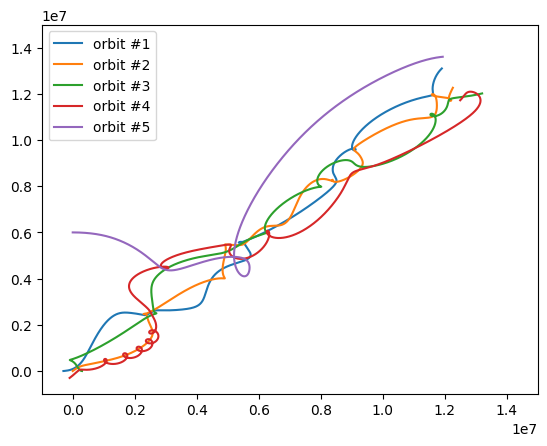

In [2]:

# G = 6.67259*10**-20

# Mass Data
masses = [10**29,10**29,10**29,10**25,10**25]

# Positional and Velocity data; Of format Rx, Vx
vectors = [
    [-300000,0,0],
    [0,0,0],
    [0,0,0],
    [250,250,0],
    [300000,0,0],
    [0,0,0],
    [-100000,-300000,0],
    [300,300,0],
    [0,6000000,0],
    [50,0,0]
]

data = Orbit_Sim.runge_kutta_system(Formatter(vectors),masses,0,150000,1,6.67259*10**-20)

# Generates a static plot of the data
Basic_Graphic(data,len(masses))

# Generates & Displays Gif Animation of the Data
Animated_Graph(data,len(masses),-10**6,1.5*10**7,-10**6,1.5*10**7,8,0,"5_body_anim")


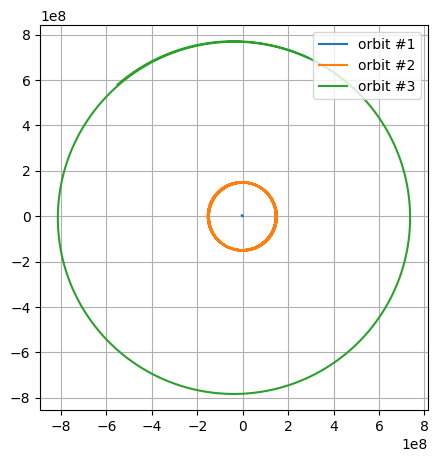

122725
frame interval: 460


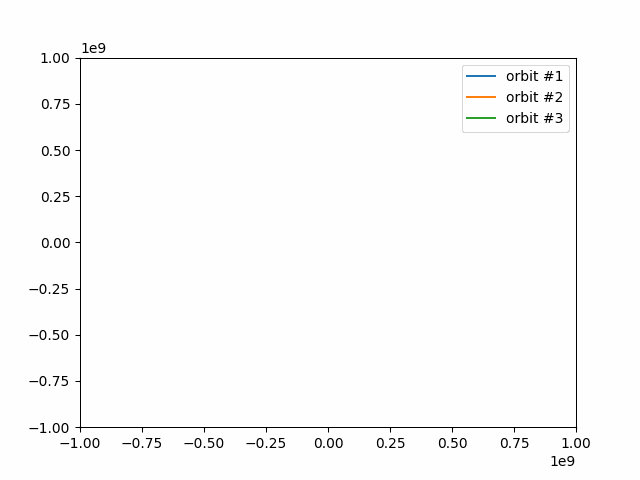

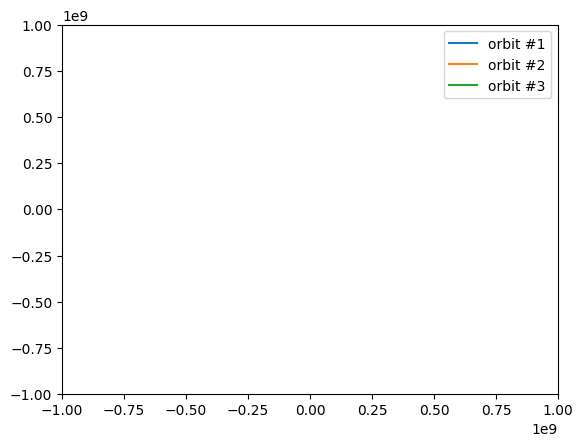

In [6]:
# # Parameters for Sun, Earth, and Jupiter
masses2 = [1.9891  * 10**30, #sun in kg
           5.97219 * 10**24, #mass of Earth in kg
           1.898   * 10**27]
# Of format Rx, Vx
vectors2 = [
    [0.0,0.0,0.0],
    [0.0,0.0,0.0],
    [ 1.431795579215212E+08,-4.756902733498507E+07,1.753005870185792E+03],
    [8.909367440390580E+00,2.816862242733466E+01,-5.922288268305209E-04],
    [2.878155148514550E+08,6.977033812658194E+08,-9.337573633872956E+06],
    [-1.223897241527747E+01,5.603781185280049E+00,2.506591419204041E-01]
]
#10.0 * 365.25 * 24 * 3600
data2 = Orbit_Sim.runge_kutta_system(Formatter(vectors2),masses2,0.0,14 * 365.25 * 24 * 3600,3600,6.67430e-20)
Basic_Graphic(data2,len(masses2))
Animated_Graph(data2,len(masses2),-10**9,10**9,-10**9,10**9,8,500,"Jupiter_Earth")

Image(filename='Jupiter_Earth.gif')

In [4]:
# Now we want Earth, Moon, and Satellites:

